# CSCI-P556
## Assignment 1
### Due date: 5:30PM, September 26, 2018


---



## Question 1: Binary Classification (35 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Like we did in linear regression, let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

### Task 1
Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 and $k_1$ points on the side of class 1. Use the function you wrote in the previous assignment to plot this dataset!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def plotLineAndPoints(l1, l2,*args):
    ### Your code goes here
    x1 = [coords[0] for coords in l1]
    y1 = [coords[1] for coords in l1]
    x2 = [coords[0] for coords in l2]
    y2 = [coords[1] for coords in l2]
    generatedX = x1+x2
    plt.plot(x1,y1,'r+',label = "Points in Class 0 i.e y = -1")
    plt.plot(x2,y2,'bo',label = "Points in Class 1 i.e y = 1")
    if len(args) != 0 and len(args[0]) == 3:
        
        a = args[0][0]
        b = args[0][1]
        c = args[0][2]
        generatedY = [(-c-a*i)/b for i in x1+x2]
        #print(generatedY)
        labelStr = "line : "+str(int(a))+"x+"+str(int(b))+"y+"+str(int(c))+" = 0"
        plt.plot(x1+x2,generatedY,color = 'green',label = labelStr)
        plt.title("Points in class 0 , points in class1 and Line")
    else: 
        plt.title("Points")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
## Sample Test Cases (We will have many more)
#plotLineAndPoints([(1, 2), (2, 4)], [(3, 4), (4, 5)],(-1,2,2))


def generate_dataset(k0, k1):
    """
    Your code for generating the dataset goes here! The output should X and y.
    You should call the visualization function from this function. Every time we 
    run this cell, it should plot a new dataset along with the line which was used
    to generate that dataset. We will test this by changing the values of k and
    running the cell multiple times
    """
    # choose random a b c values chaneg limit here
    lowerLimit = -100
    higherLimtit = 100
    
    a = np.random.uniform(lowerLimit,higherLimtit)
    b = np.random.uniform(lowerLimit,higherLimtit)
    c = np.random.uniform(lowerLimit,higherLimtit)
    x1 = np.random.uniform(lowerLimit,higherLimtit,k0)
    x2 = np.random.uniform(lowerLimit,higherLimtit,k1)
    
    #for class 1 point y > (c-ax)/b thaat implies add radom +ve number to (c-ax)/b and same for class 2
    y1 = (c - a*x1)/b + np.random.uniform(20,higherLimtit,k0)
    y2 = (c - a*x2)/b - np.random.uniform(20,higherLimtit,k1)
    
    pointsx1y1AsCords = [(x,y) for x,y in zip(x1,y1)]
    pointsx2y2AsCords = [(x,y) for x,y in zip(x2,y2)]
    plotLineAndPoints(pointsx1y1AsCords,pointsx2y2AsCords,(a,b,c))
    YClasses  = [1 if i < k1 else -1 for i in range(k0+k1) ]
    return np.column_stack((np.append(x1,x2),np.append(y1,y2))), YClasses


X,y = generate_dataset(100, 100)


### Task 2

When you are given a dataset for which you do not have access the the target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$. You learn it from the data. In this problem, it is akin to learning the parameters of the line that separates the two classes. The same line above can be represented as $$\sum_{i=0}^d w_i x_i = 0$$
Notice that $i$ starts from $0$, instead of $1$. Can you think of why?

The goal here is to correctly find out $\bf{w}$. The algorithm to find it is a simple iterative process. 
1. Randomly choose a $w$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
3. Randomly choose a sample from the dataset and see if it is correctly classified. If yes,  move on to another sample.
4. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$ , where 
    *   $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
    *   $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
    *  $y$ is the class label for the sample under consideration
    * $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.

#### Answer :
$i$ starts from 0 as we need to update the costant value (intercept) as well apart from the coefficients.



Thetas are :  [  262.36515593 -1713.69845471   225.2139077 ]


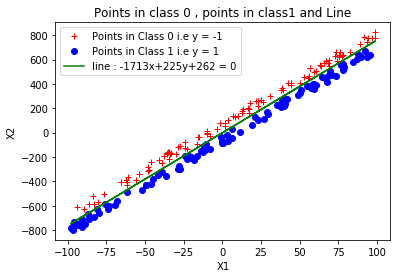

In [2]:
"""
#please note that X to be passed as the points only, without the column with 1s in the beginning as I am preparing it inside the function 

"""

def fit(X, y):
    """
    Your code for Task 2 goes here. Apart from writing the fit function,
    you should also write code to not plot the points in the dataset,
    but also plot the learned line represented by w. We will test this, by running 
    the cell for task 1 (thus generating a new dataset) and then running this cell.
    Even though the visualization of done for d=3 and 2-D points, your code should be
    generic and be able to handle any d. This will also be tested.
    """
    # let X be an array of X1 and X2 columns 
    # W be the theta vector
    
    #now x is my data set
    d = X.shape[1]+1 # numer of dimensions + 1 for X0
    W = np.array(np.random.uniform(0,1000,d))

    ones = np.array([1 for i in range(X.shape[0])])
#     print(W)
    preparedX = np.column_stack((ones,X))

    repeat = True
    while(repeat):
        countCorrectClass = 0
        for x,yac in zip(preparedX,y):
            if (W.dot(x) > 0 and yac == 1):
#                 print("correctly classified")
                countCorrectClass +=1
            elif(W.dot(x) < 0  and yac == -1):
#                 print("correctly classified")
                countCorrectClass +=1
            else:
                W = W + yac*x
#             print("Correctly classified count:", countCorrectClass)

            if (countCorrectClass == len(y)):
#                 print("All of them clasified")
                repeat = False
    
    
    if d == 3:
        x1Points = [(X[i,0],X[i,1]) for i in range(X.shape[0]) if y[i] == 1] #class 1 points
        x2Points = [(X[i,0],X[i,1]) for i in range(X.shape[0]) if y[i] == -1] #class 1 points
        coeffOfLines = (W[1],W[2],W[0])
        plotLineAndPoints(x1Points,x2Points,coeffOfLines)
        
    else:
        print("Visualisation not possible but W generated")
    return W

#change X and y here 
X = X #change new X here to test for higer d > 3
y = y #change class accordingly

W = fit(X,y)

print("Thetas are : ",W)

### Task 3
Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required.

#### Answer:
 The algorithm works because the direction of the decrease and increase in the weights is decided by the $Y$(Class) and $X$ 
 <br> Let $w_0X_0 + w_1X_1 + w_2X_2 = 0$ be the initial line that is chosen, 
 <br> Now let at a chosen point $(x_1,x_2)$ the line value  $w_0 + w_1x_1 + w_2x_2$ be  $> 0$ and $y_{actual}$ at the point be $-1$
 <br> But to correctly classify the point, the line value at the point $(x_1,x_2)$ should have been < 0
 <br> This implies that ,
 <br> &nbsp;&nbsp;1) If $x_1$ is $-ve$ the corresponding weight should be increased to decrease the value of the line at the point &nbsp;so that the value of $w_0 + w_1x_1 + w_2x_2$ decreases and tends towards negative value i.e $<0$ and the line correctly classifies the point.Note that our agenda is to make the line give a value $<0$ since the class was $y= -1$. Hence $y\times x_1$ i.e $-1 \times x_1$ which turns out $+ve$ (since x is $-ve$) gives the direction of the change to be made to corresponding weight $w_1$ i.e add a value
 <br> &nbsp;&nbsp;2) If $x_1$ is $+ve$ the corresponding weight $w_1$ should be decreased to decrease the value of the line $w_0 + w_1x_1 + w_2x_2$ on overall. Hence $y\times x_1$ i.e $-1 \times x_1$ which turns out $-ve$ (since x is $+ve$) gives the direction of the change to be made to corresponding weight $w_1$ i.e subtract a value 
  <br> The same logic applies to other weights ($w_i$) as well
#### <br> This Algorithm converges because  :
<br> The direction of the changes (decrease or increase) in the weights happens to be decided systematically and each point doesnt disturb the previous change but rather helps in further changes to the weight in the correct direction. Hence for a linearly seperable data , it always converges

### Task 4
What happens when the data is not linearly separable? What can be done to salvage the situation?

###### Answer:
<br> We could apply transformations to the variables such that there exists a linearly sperable plane.In that case we would indirectly be solving for a non linear seperation boundary.
<br> Suppose  ($x_1$ , $x_2$) are the points of two classes and are clustered and a circle exists to seperate the points in the two  classes.  we would be solving for $ax_1^2 + bx_2^2 + c > 0$ or $ax_1^2 + bx_2^2 + c < 0$, In that case applying transformation i.e $z_1 = x_1^2$ and $z_2 = x_2^2$, then we would be solving for $az_1+bz_2 + c < or > 0$ which is linear in $z_1 , z_2$ and could be solved by the above algorithm

## Question 2: Linear Regression (40 points)

There are two ways of solving the linear regression problem. The first one is called ordinary least squares, where you learn the parameters of the model by using the closed-form differentitaion of the standard cost function. This method cannot be used if there is no closed-form solution to the derivative of the cost function. In this case, we resort to gradient descent which learn the parameters by iteratively updating them until it reaches the solution i.e. the minimum of the cost function. In this problem we are going to explore both of these implementations. 

Using the code that we are providing in the next few cells, you will:


1. Implement linear regression using the ordinary least squares method
2. Implement linear regression using gradient descent
3. Execute both versions of the linear regression on sklearn's Boston Housing dataset. Plot your results. Which version executes faster? Explain why that is the case.

#### Answer
3. Though time taken for OLS is lesser than Gradient Descent here, but OLS is of complexity O($n^3$) and Gradient descent is of complexity O($n^2$) and as the n increases OLS will become slower

In [3]:
def feature_normalization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:

    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable

    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable

    '''
    #assuming n to be the number of features or columns
    n = X.shape[1]
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)
    
    mu = X- np.mean(X,axis = 0)
    sigma = X/np.std(X,axis = 0)
    X_norm = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)
    return X_norm, mu, sigma

In [4]:
def cost_function(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
  
    m = y.size
#     print(np.dot(theta,X.T))
    cost = 0
    cost = sum((y-theta.dot(X.T))**2)/(2*m)

    return cost



In [5]:

def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for i in range(0, num_iters):
        '''
        Implement gradient descent for a single gradient step on the parameter 
        vector theta. Save the result of each iteration on J_history.
        '''
       
        # for j in range(theta.size):
        J_history[i] = cost_function(X, y, theta) #store values in J_History and for the presnt theta and then update theta
    
        theta = theta - learning_rate*(np.dot((np.dot(theta,X.T)-y),X))/m # Theta - (alpha*theatX)
        
#        theta = newTheta
        
        
#         print(cost_function(X, y, theta))
        
        

    return theta, J_history

In [6]:
def linearRegression_ols(X, y):
    '''
    Implement the closed-form (or ordinary least squares) solution for
    linear regression. Save the result in the variable 'theta'.
    More information can be found at: 
      https://en.wikipedia.org/wiki/Ordinary_least_squares
    '''
    theta = np.zeros((X.shape[1], 1))
    theta = (np.linalg.inv(np.dot(X.T,X)).dot(X.T)).dot(y)

    return theta

In [7]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
m = y.size


In [8]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X


Normalizing Features ...


Running gradient descent ...
time taken for linear regression with gradient descent :  0.12692904472351074
Theta computed from gradient descent : 
[22.53269111 -0.80153942  0.86697613 -0.23056994  0.73597162 -1.70194762
  2.83315488 -0.08096679 -2.85876596  1.61270393 -1.01025156 -1.97669241
  0.8702363  -3.67513307]


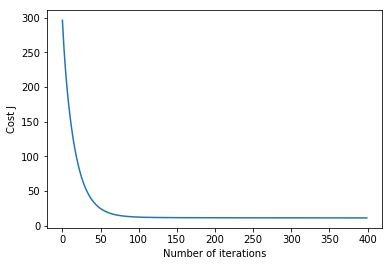

In [9]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Initialize theta and execute gradient descent

theta = np.zeros(X.shape[1])

start_time = time.time()
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)
print("time taken for linear regression with gradient descent : " , time.time()-start_time)


# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
"""
please take note that the thetas are in respect to normalised X , to be used with the actual X ,
the coefficents are to be de-normalised
"""

# Display gradient descent's result
print('Theta computed from gradient descent : \n{}'.format(theta))

In [10]:
# Now we are going to use the ordinary least squares (OLS) linear regression

# re-load dataset

from sklearn.datasets import load_boston
dataset = load_boston()

X = dataset.data
y = dataset.target
# X, mu, sigma = feature_normalization(X)
X = np.c_[np.ones(m), X] # Add intercept term to X

start_time = time.time()
theta = linearRegression_ols(X, y)
print("time taken for linear regression with ols : " , time.time()-start_time)
# Display normal equation's result
print('Theta computed from OLS linear regression : \n{}'.format(theta))

time taken for linear regression with ols :  0.0019979476928710938
Theta computed from OLS linear regression : 
[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]


#### Now lets do gradient descent with L2-regularization (or Ridge Regression). The next 6 cells are a copy of the template that we provided above with a '_regularization' added at the end of the function name. Feel free to reuse the code that you wrote above but be sure to make the appropriate modifications to the necessary functions to add L2-regularization.

In [11]:
def feature_normalization_regularization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
    n = X.shape[1]
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)
    mu = X- np.mean(X,axis = 0)
    sigma = X/np.std(X,axis = 0)
    X_norm = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)
    return X_norm, mu, sigma

In [12]:
def cost_function_regularization(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
  
    m = y.size
    cost = 0
    global lamda
    cost = sum((y-theta.dot(X.T))**2)/(2*m) + lamda*sum(theta[1:]**2)/(2*m)
    
    

    return cost

In [13]:
def gradient_descent_regularization(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    global lamda
    
    for i in range(0, num_iters):
        '''
        Implement gradient descent for a single gradient step on the parameter 
        vector theta. Save the result of each iteration on J_history.
        '''
        J_history[i] = cost_function_regularization(X, y, theta)
        linloss = np.dot(theta,X.T)-y
        #penalising only the coefficients and not the theta0 hence adding 0 at the beginning for the theta and taking the rest as is
        theta = theta - learning_rate*((np.dot(linloss,X))/m + lamda*np.append(0,theta[1:])/m) # Theta - (alpha*theatX)
        

    return theta, J_history

In [14]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
m = y.size

In [15]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalization_regularization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...


Running gradient descent ...
Theta computed from gradient descent with regularization: 
[22.53269111 -0.44379845  0.36993401 -0.4742831   0.44219371 -0.3907131
  1.48591788 -0.28297276 -0.19243476 -0.18874531 -0.44166305 -0.88819848
  0.45148467 -1.36620495]


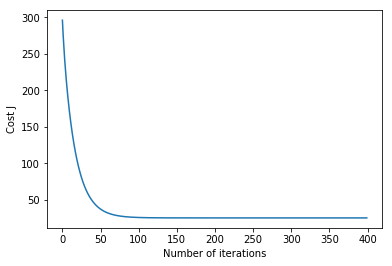

In [16]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400
lamda = 1000 #change lamda here
# Initialize theta and execute gradient descent
theta = np.zeros(X.shape[1])

theta, J_history = gradient_descent_regularization(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
"""
Please take note that the thetas are in respect to normalised X , to be used with the actual X ,
the coefficents are to be de-normalised
"""

print('Theta computed from gradient descent with regularization: \n{}'.format(theta))

## Question 3: Guess the function (25 points)

Consider three datasets provided with this notebook, namely `data1.csv` and `data2.csv`. Each dataset has 1000 samples. Every sample has 5 features $x_1, x_2, \ldots, x_5$ and a target variable $y$. In each of the datasets, the target variable has been generated from the features of a different unknown function $y$. In general, $$y=f(\mathbf{x})=\sum_{j} w_j \prod_{i=1}^5 x_i^{k_{i;j}}$$ where $x_i$ is the $i^{\text {th}}$ feature and $j$ denotes a particular term in the polynomial and $k_{i;j}$ is the power of the $i^{\text{th}}$ feature in the $j^{\text{th}}$ term. It can be any whole number from $0$ to $3$.

Thus $y_1=f_1(\mathbf{x})$;  $y_2=f_2(\mathbf{x})$ and $y_3=f_3(\mathbf{x})$.

1. Find both the unknown target functions using the given datasets. Use the dedicated cells defined below to write the corresponding methodology and code.
2. Define all your variables such that when we run the corresponding code cell, it should nicely print the correct output which supports your methodology and also prints the right answer.

#### Hints:
1. Remember that $y=f(x)$ is a POLYNOMIAL.
2. The degree of polynomial used in `data1.csv` is 1 and that used in `data2.csv` is $\leq3$.
3. Start with `data1.csv`. It is easy. And then build upon the intution which you get to solve `data2.csv`
4. Rounding off will make things easy and we encourage it. For instance, you can write 2.98 as 3!

### Methodology and answer for function 1

The theta values computeed from gradient descent  : 
[ 1.18960502e+01  1.95992261e+00 -3.94638673e+00 -5.70742007e-05
  4.04484394e+00 -1.00720015e-04]


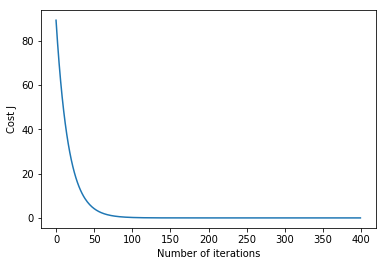

In [17]:
X = np.loadtxt("data1.csv",delimiter = ",")
Y = np.array(X[:,-1])
X = X[:,:-1]
X_Norm,mu,sigma = feature_normalization_regularization(X)
X_Norm = np.c_[np.ones(X_Norm.shape[0]), X_Norm]


theta = np.zeros(X_Norm.shape[1])
alpha = 0.03
num_iters = 400


theta,J_history = gradient_descent(X_Norm, Y, theta, alpha, num_iters)

plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
# print("The theta values are", theta)
print('The theta values computeed from gradient descent  : \n{}'.format(theta))

###### Answer for the equation is : 
If $x_i$ is the $i^{th}$ variable then the equation,
$$y = f_1(x) = 1.19 + 1.96x_1 - 3.95x_2 - 0.00006x_3 + 4.05x_4 - 0.00001x_5 $$

##### Methodology 
Since the hint is that the polynomial is of degree 1 , the equation is a linear equation hence and through gradient descent for linear regression , we arrive at the above coefficients

### Methodology and answer for function 2

#### Methodology:
Since the equation could have any possibilities of the power from (0,3) in $x_1,x_2,x_3,x_4,x_5$ there are 1024 combinations as such (i.e 4 possibilities for each of $5 x's$ hence $4^5$ combinations).Now generating all of these possibilities the task is to find the coefficients to all of the combinations, since its linear in $\theta\ \text {or} w$ we could use linear regression with regularisation and a certain lambda to penalise higher order coefficients , I have assumed a lambda of 0.1 and negleted terms whose coeffecients or $\theta$ magnitude (i.e absolute value) is less than 0.1. Hence the below is the equation and generated as below

Note that the first column in the displayed array denotes the coefficient ,and 2nd column denotes the power of the x1 and so on till x5
[[ 3.88574095e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.79138461e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 2.40431803e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.00000000e+00]
 ...
 [-4.58263300e-02  3.00000000e+00  3.00000000e+00  3.00000000e+00
   3.00000000e+00  1.00000000e+00]
 [ 2.07393774e-02  3.00000000e+00  3.00000000e+00  3.00000000e+00
   3.00000000e+00  2.00000000e+00]
 [-2.72806883e-02  3.00000000e+00  3.00000000e+00  3.00000000e+00
   3.00000000e+00  3.00000000e+00]]


#### The equation is as follows with lamda, 0and neglecting coefficients with magnitude less than  0.1 ,change lambda and threshold above accordingly to change the equation with 269 terms $38.9 + 0.2x_5^2 + 1.2x_4^1 + -0.7x_4^1x_5^1 + -0.3x_4^1x_5^3 + -3.4x_4^2 + -0.4x_4^2x_5^2 + 2.4x_4^3 + 0.4x_4^3x_5^2 + 4.4x_3^1 + -0.4x_3^1x_5^2 + 0.4x_3^1x_5^3 + -0.1x_3^1x_4^1x_5^2 + -0.1x_3^1x_4^2 + -0.5x_3^1x_4^2x_5^2 + 0.1x_3^1x_4^2x_5^3 + 0.2x_3^1x_4^3x_5^1 + 0.5x_3^2x_5^1 + 0.1x_3^2x_5^2 + -0.2x_3^2x_5^3 + -0.6x_3^2x_4^1 + -0.2x_3^2x_4^1x_5^2 + -0.2x_3^2x_4^1x_5^3 + -0.1x_3^2x_4^2 + -0.1x_3^2x_4^2x_5^1 + -0.2x_3^2x_4^2x_5^2 + 0.4x_3^2x_4^3 + 0.3x_3^2x_4^3x_5^1 + 0.3x_3^2x_4^3x_5^2 + 10.3x_3^3 + -1.0x_3^3x_5^1 + 2.0x_3^3x_5^2 + 0.3x_3^3x_5^3 + 0.5x_3^3x_4^1 + -0.2x_3^3x_4^1x_5^1 + 0.3x_3^3x_4^1x_5^2 + 2.2x_3^3x_4^2 + -0.2x_3^3x_4^2x_5^1 + 0.2x_3^3x_4^2x_5^2 + -0.4x_3^3x_4^3 + 0.2x_3^3x_4^3x_5^1 + 0.1x_2^1x_4^1x_5^3 + -0.2x_2^1x_4^2 + 0.4x_2^1x_4^2x_5^1 + 0.2x_2^1x_4^3 + -0.2x_2^1x_4^3x_5^1 + 1.1x_2^1x_3^1 + -0.2x_2^1x_3^1x_5^1 + 0.4x_2^1x_3^1x_5^2 + 0.5x_2^1x_3^1x_4^2 + -0.3x_2^1x_3^1x_4^3 + 0.4x_2^1x_3^2 + -0.9x_2^1x_3^2x_5^1 + -0.2x_2^1x_3^2x_5^2 + 0.5x_2^1x_3^2x_4^1 + -0.3x_2^1x_3^2x_4^2 + 0.4x_2^1x_3^2x_4^2x_5^1 + -0.3x_2^1x_3^3 + 0.2x_2^1x_3^3x_5^1 + 0.3x_2^1x_3^3x_5^2 + 0.5x_2^1x_3^3x_4^1 + 0.2x_2^1x_3^3x_4^1x_5^1 + -0.2x_2^1x_3^3x_4^1x_5^2 + 0.2x_2^1x_3^3x_4^2 + 0.2x_2^1x_3^3x_4^2x_5^1 + -0.2x_2^1x_3^3x_4^3x_5^1 + -0.1x_2^1x_3^3x_4^3x_5^2 + 0.3x_2^2 + -0.1x_2^2x_4^1 + -0.2x_2^2x_4^1x_5^1 + -0.2x_2^2x_4^1x_5^2 + -0.1x_2^2x_4^1x_5^3 + -0.8x_2^2x_4^2 + 0.7x_2^2x_4^3 + 0.1x_2^2x_4^3x_5^1 + 0.1x_2^2x_4^3x_5^2 + -0.1x_2^2x_3^1x_5^1 + -0.5x_2^2x_3^1x_5^2 + 0.1x_2^2x_3^1x_4^1x_5^1 + -0.8x_2^2x_3^1x_4^2 + -0.3x_2^2x_3^1x_4^2x_5^2 + -0.1x_2^2x_3^2x_5^1 + -0.3x_2^2x_3^2x_5^3 + -0.2x_2^2x_3^2x_4^1x_5^1 + -0.2x_2^2x_3^2x_4^1x_5^3 + -0.3x_2^2x_3^2x_4^2 + -0.1x_2^2x_3^2x_4^2x_5^1 + 0.3x_2^2x_3^2x_4^3 + 2.1x_2^2x_3^3 + -0.2x_2^2x_3^3x_5^1 + 0.1x_2^2x_3^3x_5^2 + 0.3x_2^2x_3^3x_5^3 + 0.3x_2^2x_3^3x_4^1x_5^1 + 0.2x_2^2x_3^3x_4^1x_5^3 + 0.2x_2^2x_3^3x_4^2 + 0.1x_2^2x_3^3x_4^3x_5^1 + 0.2x_2^3x_5^2 + 0.1x_2^3x_5^3 + -0.2x_2^3x_4^1 + 0.2x_2^3x_4^1x_5^1 + 0.1x_2^3x_4^1x_5^3 + -0.1x_2^3x_4^2x_5^3 + -0.1x_2^3x_4^3 + -0.1x_2^3x_4^3x_5^2 + 0.4x_2^3x_3^1 + -0.2x_2^3x_3^1x_4^1 + 0.1x_2^3x_3^1x_4^1x_5^2 + -0.1x_2^3x_3^1x_4^2 + -0.1x_2^3x_3^1x_4^2x_5^2 + -0.1x_2^3x_3^1x_4^3 + 0.1x_2^3x_3^1x_4^3x_5^2 + -0.1x_2^3x_3^2 + 0.1x_2^3x_3^2x_5^3 + 0.2x_2^3x_3^2x_4^1x_5^1 + 0.1x_2^3x_3^2x_4^1x_5^3 + -0.2x_2^3x_3^2x_4^2 + -0.1x_2^3x_3^2x_4^3 + 0.2x_2^3x_3^3 + 0.1x_2^3x_3^3x_5^2 + -0.2x_2^3x_3^3x_5^3 + -0.1x_2^3x_3^3x_4^3 + 0.1x_1^1x_4^1 + 0.1x_1^1x_4^1x_5^2 + 0.2x_1^1x_4^2x_5^1 + -0.3x_1^1x_3^1 + -0.1x_1^1x_3^1x_5^1 + -0.2x_1^1x_3^1x_5^2 + 0.2x_1^1x_3^1x_4^1x_5^1 + 0.2x_1^1x_3^1x_4^1x_5^2 + 0.3x_1^1x_3^1x_4^2 + 0.2x_1^1x_3^1x_4^2x_5^1 + -0.1x_1^1x_3^1x_4^3 + -0.9x_1^1x_3^2 + -0.4x_1^1x_3^2x_4^1 + 0.3x_1^1x_3^2x_4^1x_5^1 + 0.3x_1^1x_3^2x_4^2 + -0.2x_1^1x_3^2x_4^3 + 0.5x_1^1x_3^3 + -0.9x_1^1x_3^3x_5^1 + 0.3x_1^1x_3^3x_5^2 + -0.4x_1^1x_3^3x_4^1 + 0.7x_1^1x_3^3x_4^1x_5^2 + 0.4x_1^1x_3^3x_4^2 + 0.2x_1^1x_3^3x_4^2x_5^1 + 0.1x_1^1x_3^3x_4^2x_5^2 + -0.1x_1^1x_3^3x_4^3 + 0.1x_1^1x_3^3x_4^3x_5^1 + 0.1x_1^1x_3^3x_4^3x_5^2 + -0.1x_1^1x_2^1 + -0.2x_1^1x_2^1x_4^1 + 0.2x_1^1x_2^1x_4^2 + 0.1x_1^1x_2^1x_3^1 + -0.1x_1^1x_2^1x_3^1x_5^3 + -0.1x_1^1x_2^1x_3^1x_4^1x_5^1 + -0.1x_1^1x_2^1x_3^1x_4^1x_5^2 + 0.2x_1^1x_2^1x_3^1x_4^2 + -0.2x_1^1x_2^1x_3^1x_4^3 + -0.3x_1^1x_2^1x_3^2x_5^1 + -0.5x_1^1x_2^1x_3^2x_4^1 + 0.1x_1^1x_2^1x_3^2x_4^2x_5^2 + -1.2x_1^1x_2^1x_3^3 + 0.3x_1^1x_2^1x_3^3x_5^1 + -0.1x_1^1x_2^1x_3^3x_5^2 + -0.1x_1^1x_2^1x_3^3x_5^3 + -0.1x_1^1x_2^1x_3^3x_4^1 + -0.2x_1^1x_2^1x_3^3x_4^1x_5^1 + -0.1x_1^1x_2^1x_3^3x_4^1x_5^2 + -0.3x_1^1x_2^1x_3^3x_4^2 + -0.1x_1^1x_2^1x_3^3x_4^3x_5^1 + 0.2x_1^1x_2^2 + 0.3x_1^1x_2^2x_4^2 + -0.1x_1^1x_2^2x_3^1 + 0.2x_1^1x_2^2x_3^1x_5^3 + 0.1x_1^1x_2^2x_3^1x_4^1 + -0.1x_1^1x_2^2x_3^2 + -0.2x_1^1x_2^2x_3^2x_5^1 + 0.1x_1^1x_2^2x_3^2x_5^2 + -0.2x_1^1x_2^2x_3^2x_5^3 + -0.1x_1^1x_2^2x_3^2x_4^2x_5^1 + 0.3x_1^1x_2^2x_3^3x_5^3 + -0.2x_1^1x_2^2x_3^3x_4^1 + 0.1x_1^1x_2^3x_4^2 + 0.3x_1^1x_2^3x_3^1 + 0.2x_1^1x_2^3x_3^1x_4^1 + 0.2x_1^1x_2^3x_3^1x_4^2 + 0.1x_1^1x_2^3x_3^2 + 0.2x_1^1x_2^3x_3^2x_4^2 + -0.1x_1^1x_2^3x_3^3x_5^3 + 0.2x_1^1x_2^3x_3^3x_4^1 + -0.1x_1^1x_2^3x_3^3x_4^1x_5^1 + 0.1x_1^1x_2^3x_3^3x_4^2 + 1.2x_1^2 + -0.2x_1^2x_5^1 + 0.2x_1^2x_5^2 + -0.2x_1^2x_5^3 + -0.3x_1^2x_4^1x_5^1 + -0.4x_1^2x_4^2 + -0.1x_1^2x_4^2x_5^2 + 0.5x_1^2x_4^3 + -0.4x_1^2x_3^1 + 0.3x_1^2x_3^1x_5^1 + -0.6x_1^2x_3^1x_5^2 + 0.1x_1^2x_3^1x_5^3 + -0.6x_1^2x_3^1x_4^2 + -0.2x_1^2x_3^1x_4^2x_5^2 + 0.6x_1^2x_3^2x_5^1 + -0.2x_1^2x_3^2x_4^1 + 0.1x_1^2x_3^2x_4^2 + 0.2x_1^2x_3^2x_4^2x_5^1 + 0.1x_1^2x_3^2x_4^3 + 0.1x_1^2x_3^2x_4^3x_5^2 + 3.1x_1^2x_3^3 + -0.2x_1^2x_3^3x_5^1 + 0.4x_1^2x_3^3x_5^2 + 0.1x_1^2x_3^3x_5^3 + 0.7x_1^2x_3^3x_4^1 + -0.2x_1^2x_3^3x_4^1x_5^1 + 0.2x_1^2x_3^3x_4^1x_5^2 + 0.6x_1^2x_3^3x_4^2 + 0.1x_1^2x_3^3x_4^2x_5^1 + 0.1x_1^2x_3^3x_4^2x_5^2 + -0.1x_1^2x_2^1x_5^1 + 0.1x_1^2x_2^1x_4^2x_5^1 + -0.2x_1^2x_2^1x_4^3x_5^1 + 0.2x_1^2x_2^1x_3^1 + 0.2x_1^2x_2^1x_3^2 + -0.1x_1^2x_2^1x_3^2x_5^1 + 0.1x_1^2x_2^1x_3^2x_4^1 + 0.2x_1^2x_2^1x_3^2x_4^2x_5^1 + -0.2x_1^2x_2^1x_3^3 + 0.2x_1^2x_2^1x_3^3x_5^1 + 0.2x_1^2x_2^1x_3^3x_4^1 + 0.2x_1^2x_2^1x_3^3x_4^1x_5^1 + 0.1x_1^2x_2^1x_3^3x_4^2 + 0.4x_1^2x_2^2 + -0.1x_1^2x_2^2x_4^1 + -0.6x_1^2x_2^2x_3^1 + -0.3x_1^2x_2^2x_3^1x_5^2 + -0.1x_1^2x_2^2x_3^1x_4^1 + -0.2x_1^2x_2^2x_3^1x_4^2 + -0.1x_1^2x_2^2x_3^1x_4^3 + 0.1x_1^2x_2^2x_3^2 + -0.1x_1^2x_2^2x_3^2x_4^1x_5^3 + 0.3x_1^2x_2^2x_3^3 + 0.1x_1^2x_2^2x_3^3x_5^3 + 0.1x_1^2x_2^2x_3^3x_4^2x_5^1 + -0.2x_1^2x_2^2x_3^3x_4^3 + 0.1x_1^2x_2^3x_3^2x_5^3 + -0.1x_1^2x_2^3x_3^2x_4^2 + -0.1x_1^2x_2^3x_3^3x_4^2 + -0.2x_1^3x_4^2 + -0.1x_1^3x_4^2x_5^2 + -0.2x_1^3x_3^1x_4^1 + -0.1x_1^3x_3^2x_5^1 + -0.4x_1^3x_3^3x_4^1 + 0.1x_1^3x_3^3x_4^1x_5^2 + -0.2x_1^3x_2^1 + 0.3x_1^3x_2^1x_3^1 + 0.2x_1^3x_2^1x_3^1x_5^1 + 0.1x_1^3x_2^1x_3^1x_5^2 + 0.2x_1^3x_2^1x_3^1x_4^1 + -0.3x_1^3x_2^1x_3^2 + -0.2x_1^3x_2^1x_3^2x_4^1 + 0.1x_1^3x_2^1x_3^3x_5^1 + 0.1x_1^3x_2^2 + -0.1x_1^3x_2^2x_3^1 + -0.1x_1^3x_2^2x_3^3 + 0.1x_1^3x_2^3x_3^1 + 0.1x_1^3x_2^3x_3^3x_4^1 = 0 $

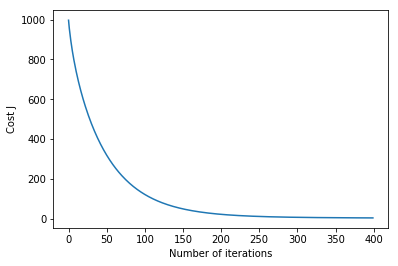

In [19]:
## Code for function 2
## Code generatnig combinations with my own loops
maxPower = 3
X = np.loadtxt("data2.csv",delimiter = ",")
Y = X[:,-1]
X = X[:,:-1]
origNumCol = X.shape[1]
"""
change the threshold and lamda accordingly
"""
threshHold = 0.1 
lamda = 0



#generating columns with different powers
for column in range(origNumCol):
    for i in range(maxPower+1):
        X = np.column_stack((X,X[:,column]**i))
   
# print(X[:,2])
#first five are original and then x^0 , x^1,x^2,x^3
XforFit = X[:,5:]
# print(XforFit.shape)
AllX = np.copy(XforFit)



## generating all combos of powers 
powers = np.zeros(5)
for i in range(4):
    for j in range(4,8):
        for k in range(8,12):
            for l in range(12,16):
                for m in range(16,20):
                    powers = np.row_stack((powers,np.array([i,j-4,k-8,l-12,m-16])))
                    AllX = np.column_stack((AllX,AllX[:,i]*AllX[:,j]*AllX[:,k]*AllX[:,l]*AllX[:,m]))
               
    
AllX = AllX[:,21:]
powers = powers[1:,:]
AllXNorm, mu, sigma = feature_normalization_regularization(AllX)
AllXNorm = np.c_[np.ones(AllXNorm.shape[0]), AllXNorm]


# print(type(AllXNorm))
theta = np.zeros(AllXNorm.shape[1])
# print(theta)
# print(AllXNorm)
# print(Y.size)

theta, J_history = gradient_descent_regularization(AllXNorm,Y,theta,0.01,400)

plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
thetaAndPowers = np.column_stack((theta,powers))
# len(theta[abs(theta)> 0.1])
# print(theta.shape)
# print(thetaAndPowers)
print("Note that the first column in the displayed array denotes the coefficient ,and 2nd column denotes the power of the x1 and so on till x5")
AllThetas = np.copy(thetaAndPowers)
print(AllThetas)
thetaAndPowers = thetaAndPowers[abs(thetaAndPowers[:,0])>threshHold,:]

"""
note that the first column in the displayed array denotes the coefficient , 
and 2nd column denotes the power of the x1 and so on till x5
"""


##code for generating Latek equations for the required coeffecitins
MarkDownstring = ""
x = ['','x_1^','x_2^','x_3^','x_4^','x_5^']
for i in range(thetaAndPowers.shape[0]):
    MarkDownstring  = MarkDownstring + str(round(thetaAndPowers[i,0],1))
    for j in range(1,thetaAndPowers.shape[1]):
        
        if thetaAndPowers[i,j] != 0:
            MarkDownstring = MarkDownstring + x[j] + str(int(round(thetaAndPowers[i,j],1)))
    MarkDownstring =  MarkDownstring + ' + '
# print('$'+MarkDownstring+'$')

from IPython.display import display, Markdown, Latex
display(Markdown("#### The equation is as follows with lamda, " + str(lamda)+  "and neglecting coefficients with magnitude less than  "
                + str(threshHold) + " ,change lambda and threshold above accordingly to change the equation with " + 
                 str(thetaAndPowers.shape[0]) +" terms "+'$'+MarkDownstring[:-2]+ "= 0 " +'$'))

